# Fake news Detection

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

### Reading fake and real dataset

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Inserting a column called "class" for fake and real news dataset to categories fake and true news. 

Assigning 0 for news belonging to fake class and 1 for news belonging to true class

In [5]:
df_fake["class"] = 0
df_true["class"] = 1

Removing last 10 rows from both the dataset, for manual testing  

In [6]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [7]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

### Checking the shape for fake news dataframe and true news dataframe

In [8]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

Merging the manual testing dataframe in single dataset and save it in a csv file

In [9]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

<ipython-input-9-3aaf8ec2aad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
<ipython-input-9-3aaf8ec2aad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [10]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [11]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [12]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

Merging the main fake and true dataframe

In [13]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


#### Checking for the columns present after merging the two dataframes

In [14]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

#### "title" and "date" columns are not required for detecting the fake news, so dropping these columns.

In [15]:
df = df_merge.drop(["title", "date"], axis = 1)

In [16]:
df.isna().sum()

text       0
subject    0
class      0
dtype: int64

In [17]:
df.head()

,text,subject,class
0,Donald Trump just couldn t wish all Americans ...,News,0
1,House Intelligence Committee Chairman Devin Nu...,News,0
2,"On Friday, it was revealed that former Milwauk...",News,0
3,"On Christmas day, Donald Trump announced that ...",News,0
4,Pope Francis used his annual Christmas Day mes...,News,0


#### Counting the total number of fake and real news present in dataframe

<AxesSubplot:xlabel='class', ylabel='count'>

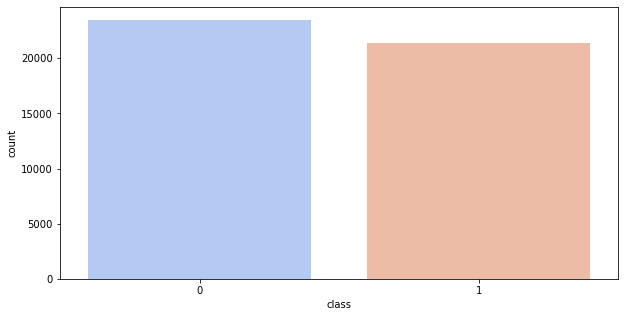

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(x='class', data=df, palette='coolwarm')

Total count of fake news is more than that of real news

#### Counting the number of news under each category of subjects

<AxesSubplot:xlabel='subject', ylabel='count'>

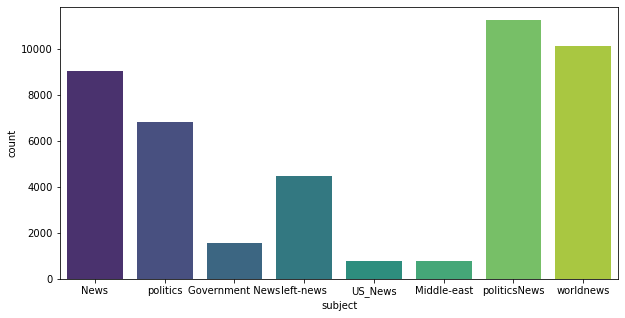

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(x='subject', data=df, palette='viridis')

Maximum number of news is related to politics followed by world news. US_News has the least count

#### Visualizing the number of real and fake news for each category of subject

<AxesSubplot:xlabel='subject', ylabel='count'>

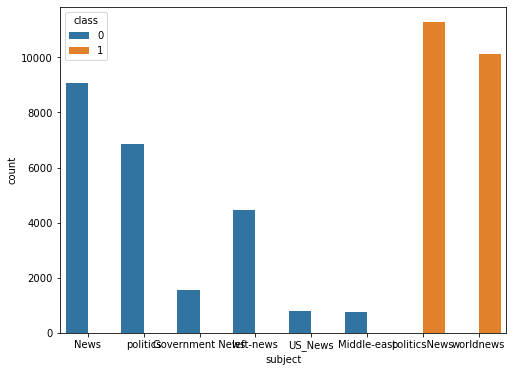

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x='subject', hue='class', data=df)

#### Randomly shuffling the dataframe 

In [21]:
df = df.sample(frac = 1)

In [22]:
df.head()

,text,subject,class
10890,Deputy Press Secretary Sarah Huckabee Sanders ...,politics,0
21747,The war on the American flag continues.Retired...,left-news,0
19952,"On September 15, Hillary apparently held a r...",left-news,0
4634,WASHINGTON (Reuters) - Trump administration tr...,politicsNews,1
2769,Donald Trump s disgusting Muslim ban is being ...,News,0


In [23]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [24]:
df.columns

Index(['text', 'subject', 'class'], dtype='object')

In [25]:
df.head()

,text,subject,class
0,Deputy Press Secretary Sarah Huckabee Sanders ...,politics,0
1,The war on the American flag continues.Retired...,left-news,0
2,"On September 15, Hillary apparently held a r...",left-news,0
3,WASHINGTON (Reuters) - Trump administration tr...,politicsNews,1
4,Donald Trump s disgusting Muslim ban is being ...,News,0


#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [26]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [27]:
df["text"] = df["text"].apply(wordopt)

#### Defining dependent and independent variable as x and y

In [28]:
x = df["text"]
y = df["class"]

#### Plotting histograms for real news and fake news

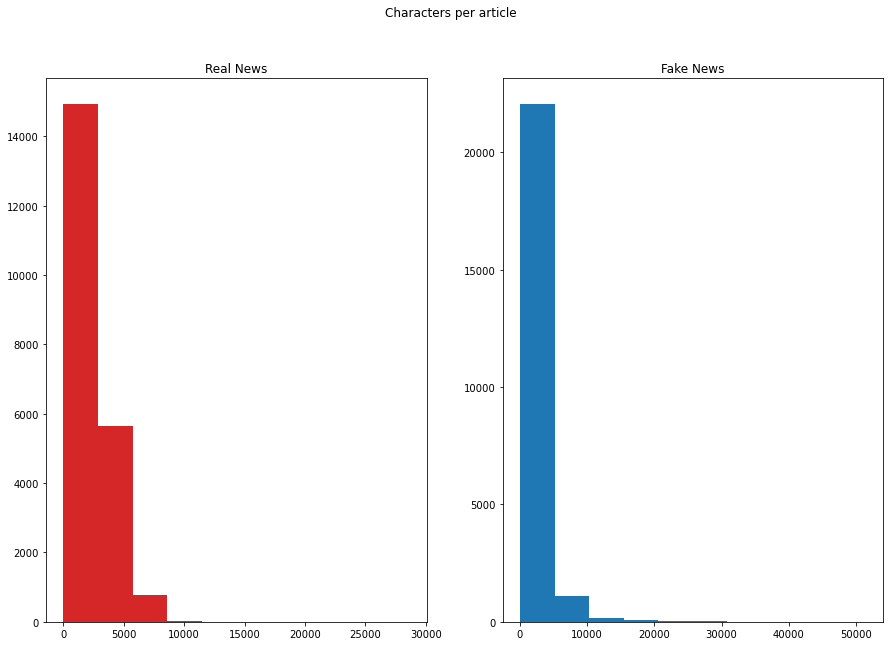

In [29]:
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(15, 10))
text_len=df[df['class']==1]['text'].str.len()
ax1.hist(text_len, color='tab:red')
ax1.set_title('Real News')
text_len=df[df['class']==0]['text'].str.len()
ax2.hist(text_len, color='tab:blue')
ax2.set_title('Fake News')
fig.suptitle('Characters per article')
plt.show()

#### Splitting the dataset into training set and testing set. 

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

#### Converting text to vectors

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### 1. Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [35]:
pred_lr=LR.predict(xv_test)

In [36]:
LR.score(xv_test, y_test)

0.9854055258467023

In [37]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      9345
           1       0.98      0.99      0.98      8607

    accuracy                           0.99     17952
   macro avg       0.99      0.99      0.99     17952
weighted avg       0.99      0.99      0.99     17952



### 2. Decision Tree Classification

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [41]:
pred_dt = DT.predict(xv_test)

In [42]:
DT.score(xv_test, y_test)

0.9941510695187166

In [43]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9345
           1       0.99      0.99      0.99      8607

    accuracy                           0.99     17952
   macro avg       0.99      0.99      0.99     17952
weighted avg       0.99      0.99      0.99     17952



### 3. Gradient Boosting Classifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [46]:
pred_gbc = GBC.predict(xv_test)

In [47]:
GBC.score(xv_test, y_test)

0.995376559714795

In [48]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      9345
           1       0.99      1.00      1.00      8607

    accuracy                           1.00     17952
   macro avg       1.00      1.00      1.00     17952
weighted avg       1.00      1.00      1.00     17952



### 4. Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [51]:
pred_rfc = RFC.predict(xv_test)

In [52]:
RFC.score(xv_test, y_test)

0.9872994652406417

In [53]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9345
           1       0.99      0.99      0.99      8607

    accuracy                           0.99     17952
   macro avg       0.99      0.99      0.99     17952
weighted avg       0.99      0.99      0.99     17952



# Model Testing With Manual Entry

### News

In [54]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [64]:
news = str(input())
manual_testing(news)

WASHINGTON (Reuters) - The chairman of the House of Representativesâ€™ tax-writing committee on Wednesday predicted there will be strong support for repealing the Obamacare individual healthcare mandate when House-Senate negotiators hash out differences in their tax reform plans. â€œWeâ€™re very supportive of getting rid of that tax. Weâ€™re encouraged by the Senateâ€™s action; weâ€™re hopeful they pass it. And I think in conference committee youâ€™ll see strong support,â€ Representative Kevin Brady, a Republican, said in an interview with Fox News.  The House version of the tax bill, which will be voted on this week, does not repeal the mandate. 


LR Prediction: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction: Not A Fake News
